# WildFires predictions w/ PyTorch

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import torch
import torchvision
import torchvision.transforms as transforms

## Import data

To import data, we will create a data loader for the test dataset, the train and the validation ones.

In [4]:
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

Creating dataframes for validation, test and training

In [5]:
from torchvision.io import read_image

def checkfile(filepath):
    try:
        img = read_image(filepath)
        return True
    except:
        print(f"{filepath} Image could not be read")
        return False

In [7]:
filenames, annots = [], []
for filename in os.listdir(os.path.join('data/test', 'nowildfire')):
    if checkfile(os.path.join('data/test', 'nowildfire', filename)):
        filenames.append(os.path.join('nowildfire', filename))
        annots.append(0)
for filename in os.listdir(os.path.join('data/test', 'wildfire')):
    if checkfile(os.path.join('data/test', 'wildfire', filename)):
        filenames.append(os.path.join('wildfire', filename))
        annots.append(1)
df_test = pd.DataFrame(columns=['filename', 'wildfire'])
df_test['filename'] = filenames
df_test['wildfire'] = annots

df_test.shape

data/test\wildfire\-73.15884,46.38819.jpg Image could not be read


(6299, 2)

In [8]:
df_test.sample(3)

,filename,wildfire
111,"nowildfire\-113.957602,50.935677.jpg",0
5010,"wildfire\-75.07044,45.79047.jpg",1
4556,"wildfire\-73.84576,47.76259.jpg",1


In [9]:
filenames, annots = [], []
for filename in os.listdir(os.path.join('data/train', 'nowildfire')):
    if checkfile(os.path.join('data/train', 'nowildfire', filename)):
        filenames.append(os.path.join('nowildfire', filename))
        annots.append(0)
for filename in os.listdir(os.path.join('data/train', 'wildfire')):
    if checkfile(os.path.join('data/train', 'wildfire', filename)):
        filenames.append(os.path.join('wildfire', filename))
        annots.append(1)
df_train = pd.DataFrame(columns=['filename', 'wildfire'])
df_train['filename'] = filenames
df_train['wildfire'] = annots

df_train.shape

data/train\nowildfire\-114.152378,51.027198.jpg Image could not be read


(30249, 2)

In [10]:
filenames, annots = [], []
for filename in os.listdir(os.path.join('data/valid', 'nowildfire')):
    if checkfile(os.path.join('data/valid', 'nowildfire', filename)):
        filenames.append(os.path.join('nowildfire', filename))
        annots.append(0)
for filename in os.listdir(os.path.join('data/valid', 'wildfire')):
    if checkfile(os.path.join('data/valid', 'wildfire', filename)):
        filenames.append(os.path.join('wildfire', filename))
        annots.append(1)
df_val = pd.DataFrame(columns=['filename', 'wildfire'])
df_val['filename'] = filenames
df_val['wildfire'] = annots

df_val.shape

(6300, 2)

### PLOT all fires using locations on a map

Creating a custom dataset class

In [12]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
        self.img_labels = annotations_file
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        image = image.float()
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [13]:
transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_data = CustomImageDataset(df_test, 'data/test', transform=transform)
training_data = CustomImageDataset(df_train, 'data/train', transform=transform)
val_data = CustomImageDataset(df_val, 'data/valid', transform=transform)

In [15]:
sample_image = test_data[500]
sample_image

(tensor([[[201., 197., 203.,  ..., 289., 287., 281.],
          [179., 181., 187.,  ..., 291., 291., 285.],
          [159., 165., 185.,  ..., 239., 245., 237.],
          ...,
          [289., 279., 305.,  ..., 295., 251., 247.],
          [219., 223., 253.,  ..., 273., 233., 225.],
          [133., 149., 169.,  ..., 271., 253., 243.]],
 
         [[205., 201., 207.,  ..., 285., 287., 285.],
          [183., 185., 191.,  ..., 293., 295., 291.],
          [163., 169., 193.,  ..., 245., 251., 247.],
          ...,
          [305., 295., 321.,  ..., 293., 249., 241.],
          [235., 239., 269.,  ..., 267., 227., 219.],
          [149., 165., 187.,  ..., 265., 247., 233.]],
 
         [[203., 199., 205.,  ..., 261., 263., 259.],
          [181., 183., 189.,  ..., 265., 267., 257.],
          [161., 167., 191.,  ..., 207., 209., 203.],
          ...,
          [279., 269., 291.,  ..., 257., 213., 203.],
          [209., 209., 239.,  ..., 233., 189., 181.],
          [119., 135., 153.,  .

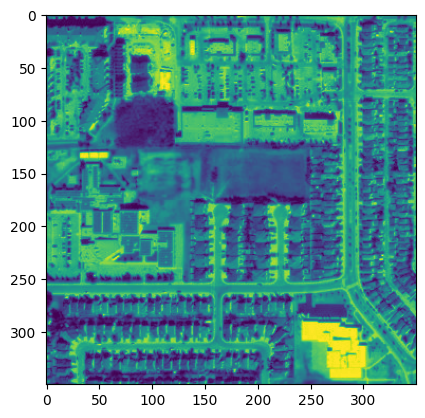

In [22]:
plt.imshow(sample_image[0][0]) 
plt.show()

### Prepare the data for training with DataLoaders

In [23]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=True)

> Iterate through the DataLoader

Feature batch shape: torch.Size([64, 3, 350, 350])
Labels batch shape: torch.Size([64])


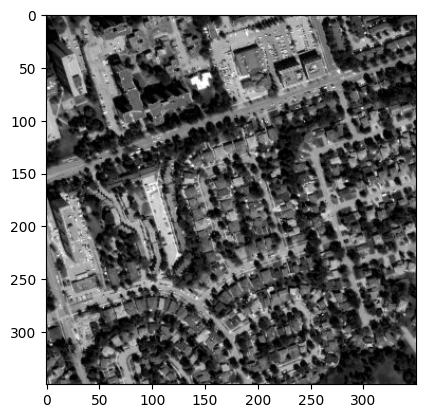

Label: 0


In [24]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0][0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [25]:
classes = ('no wildfire', 'wildfire')

## Define a Convolutional Neural Network

In [29]:
(350 / 2) * 4 * 4

2800.0

In [38]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 4, 1)
        self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(4, 5, 1)
        self.fc1 = nn.Linear(int((350/2)*4*4), 64) # Image size * out_channels * out_channels
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [35]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [36]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [67]:
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## Test the network on the test data

In [69]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

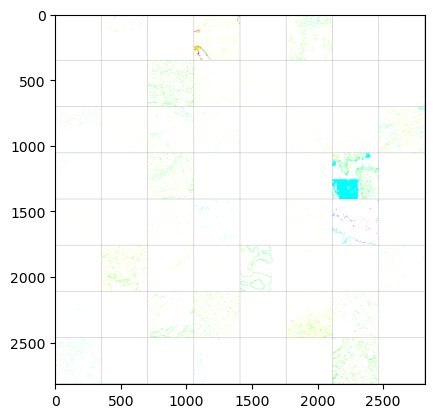

GroundTruth:  wildfire wildfire wildfire wildfire


In [70]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [71]:
outputs = net(images)
outputs

tensor([[-0.5751, -1.0212],
        [ 1.0169, -2.4662],
        [-2.5239,  0.7177],
        [-1.6671, -0.1857],
        [ 1.0530, -2.0456],
        [-0.6964, -0.6151],
        [-1.6431, -0.3109],
        [ 2.1941, -3.4178],
        [-2.0339,  0.2811],
        [-2.4505,  0.6176],
        [ 1.1404, -2.2498],
        [-1.6690,  0.0502],
        [-2.4702,  0.7245],
        [-1.0389, -0.3253],
        [-2.3830,  0.6480],
        [-1.7579,  0.1378],
        [-1.7460, -0.0436],
        [ 0.7899, -2.1501],
        [-2.1144,  0.3611],
        [-2.4661,  0.7171],
        [-2.4803,  0.6699],
        [-2.5870,  0.6688],
        [-2.4980,  0.7110],
        [-2.3366,  0.6587],
        [-2.3775,  0.6276],
        [-2.2036,  0.5240],
        [ 1.0339, -1.9772],
        [ 3.1749, -5.0625],
        [-1.3530, -0.0504],
        [ 2.8438, -3.9246],
        [-2.1347,  0.5966],
        [ 1.4124, -2.7546],
        [-2.4141,  0.6487],
        [ 4.1343, -6.0945],
        [ 1.1439, -2.0731],
        [-1.6578,  0

In [72]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  no wildfire no wildfire wildfire wildfire


Let us look at how the network performs on the whole dataset.

In [73]:
correct = 0
total = 0

# We're not training, we do not need to calculate the gradients
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the test images: {100 * correct // total} %")

Accuracy of the network on the test images: 90 %
